## intruduction
数据从 log 录入 sqlite 的工作由 golang 完成

In [3]:
# 准备工作

import sqlite3

conn = sqlite3.connect('data/test.db')
cursor = conn.cursor()

cursor.execute('SELECT user, password, count(*) FROM records where password = "123456" GROUP BY user, password ORDER BY count(*) DESC LIMIT 10')
results = cursor.fetchall()
for row in results:
    print(row)

('usvq', '123456', 6)
('blbl', '123456', 4)
('igus', '123456', 4)
('tmww', '123456', 4)
('wbyl', '123456', 4)
('adyt', '123456', 3)
('dnyi', '123456', 3)
('gcwf', '123456', 3)
('ipuk', '123456', 3)
('ntia', '123456', 3)


['123456', 'nted', 'ituq', 'rwyk', 'naga', 'hhdm', 'stug', 'qyqy', 'lfbe', 'gard'] [110, 5, 5, 4, 4, 4, 3, 3, 3, 3]


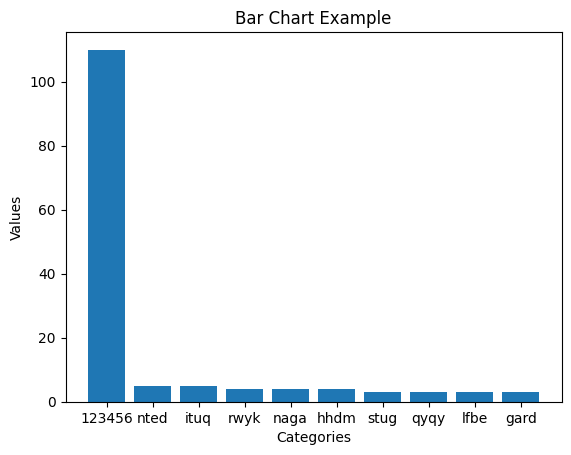

In [7]:
import matplotlib.pyplot as plt
users = []
counts = []

cursor.execute('SELECT password, count(*) FROM records GROUP BY password ORDER BY count(*) DESC LIMIT 10')
results = cursor.fetchall()
for row in results:
    users.append(row[0])
    counts.append(row[1])

print(users, counts)
# 绘制条形图
plt.bar(users, counts)

# 添加标题和轴标签
plt.title('Bar Chart Example')
plt.xlabel('Categories')
plt.ylabel('Values')

# 显示图形
plt.show()

In [7]:
import re

rePureNum = r"^\d+$"
rePureLetter = r"^[a-zA-Z]+$"



def is_pattern_common(password):
    return re.search(rePureNum, password)

def is_pattern_pure_letter(password):
    return re.search(rePureLetter, password)

cntPureNumber = 0
cntPureLetter = 0
mapNumberLenCount = {}
mapLetterLenCount = {}

cursor.execute('SELECT password FROM records')
results = cursor.fetchall()
for row in results:

    if is_pattern_common(row[0]):
        cntPureNumber += 1
        if len(row[0]) not in mapNumberLenCount:
            mapNumberLenCount[len(row[0])] = 0
        mapNumberLenCount[len(row[0])] += 1
    elif is_pattern_pure_letter(row[0]):
        cntPureLetter += 1
        if len(row[0]) not in mapLetterLenCount:
            mapLetterLenCount[len(row[0])] = 0
        mapLetterLenCount[len(row[0])] += 1

print(f"PureNumber: {cntPureNumber}, PureLetter: {cntPureLetter}")
print(mapNumberLenCount)
print(mapLetterLenCount)

PureNumber: 118, PureLetter: 109
{6: 111, 8: 1, 1: 2, 2: 1, 5: 1, 3: 1, 4: 1}
{4: 91, 10: 3, 8: 3, 2: 2, 9: 1, 3: 3, 6: 4, 11: 2}
